<a href="https://colab.research.google.com/github/alefemoreira/correlation-digital-image-processing/blob/main/PROCESSAMENTO%20DIGITAL%20DE%20IMAGENS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
from PIL import Image
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

original_image1 = Image.open('/content/drive/MyDrive/pdi_images/Lenna.png').convert('RGB')
original_image2 = Image.open('/content/drive/MyDrive/pdi_images/parrots.jpeg').convert('RGB')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Funções Gerais

In [ ]:
def partition(v, s, e):
    p = e
    i = s
    for j in range(s, e):
        if v[j] <= v[p]:
            (v[j], v[i]) = (v[i], v[j])
            i+=1
    v[p], v[i] = v[i], v[p]
    return i    

def quicksort(v, s, e):
    if e <= s:
        return
    p = partition(v, s, e);
    quicksort(v, s, p - 1)
    quicksort(v, p + 1, e)

def median(v):
    a = v.copy()
    quicksort(a, 0, len(a) - 1)
    mid = floor(len(a) / 2)
    if len(a) % 2 == 0:
        return (a[mid] + a[mid-1]) // 2
    return a[mid]

def neighborsRGB(v, pos, size, center, use_zero=True):
    m, n = size
    i, j = pos
    i_0, j_0 = center

    neighborsR = [None] * m * n
    neighborsG = [None] * m * n
    neighborsB = [None] * m * n

    neighborsR[i_0 * n + j_0] = v[i][j][0]
    neighborsG[i_0 * n + j_0] = v[i][j][1]
    neighborsB[i_0 * n + j_0] = v[i][j][2]

    for _i in range(0, m):
        deltaM = _i - i_0
        for _j in range(0, n):
            deltaN = _j - j_0
            iOutOfBound = i + deltaM < 0 or i + deltaM >= len(v)
            jOutOfBound = j + deltaN < 0 or j + deltaN >= len(v[0])
            hasIndexOutOfBound = iOutOfBound or jOutOfBound

            if hasIndexOutOfBound and not use_zero:
                return None

            if hasIndexOutOfBound and use_zero:
                  neighborsR[_i * n + _j] = 0
                  neighborsG[_i * n + _j] = 0
                  neighborsB[_i * n + _j] = 0
                  continue             
          
            neighborsR[_i * n + _j] = v[i + deltaM][j + deltaN][0]
            neighborsG[_i * n + _j] = v[i + deltaM][j + deltaN][1]
            neighborsB[_i * n + _j] = v[i + deltaM][j + deltaN][2]
            

    return (neighborsR, neighborsG, neighborsB)


###Conversão RGB-YIQ-RGB


Explicação...

- Y = 0.299*R + 0.587*G + 0.114*B
- I = 0.596*R – 0.275*G – 0.321*B 
- Q = 0.212*R – 0.523*G + 0.311*B

In [ ]:
def rgb_to_yiq(image):
  """
    Recebe uma imagem em formato ndarray e retorna esse mesmo ndarray com a conversão aplicada    
  """


  # Convertendo da classe PIL.Image.Image para numpy.ndarray
  # image_np = np.array(image, 'uint8')

  new_imagem = []

  for line in image:
    new_line = []
    for pixel in line:
      r,g,b = pixel[0], pixel[1], pixel[2]  

      # Conversão para YIQ
      y = math.ceil(0.299*r + 0.587*g + 0.114*b)
      i = math.ceil(0.596*r - 0.275*g - 0.321*b)
      q = math.ceil(0.212*r - 0.523*g + 0.311*b)

      # Novo pixel
      new_line.append([y, i, q])

    # Nova linha
    new_imagem.append(new_line)

  # Convertendo a imagem para PIL.Image.Image
  # new_imagem = Image.fromarray(np.uint8(new_imagem))
    
  return new_imagem


def yiq_to_rgb(image):
    # Convertendo da classe PIL.Image.Image para numpy.ndarray
    # image_np = np.array(image, 'uint8')

    new_image = []  
    for line in image:
      new_line = []
      for pixel in line:
        y,i,q = pixel[0], pixel[1], pixel[2]  

        # Conversão para RGB
        r = math.ceil(y + 0.956*i + 0.621*q)
        g = math.ceil(y - 0.272*i - 0.647*q)
        b = math.ceil(y - 1.106*i + 1.703*q)
        
        # Normalizando os limites
        r = 0 if r < 0 else r
        r = 255 if r > 255 else r

        g = 0 if g < 0 else g
        g = 255 if g > 255 else g
        
        b = 0 if b < 0 else b
        b = 255 if b > 255 else b

        # Novo pixel
        new_line.append([r, g, b])

      # Nova linha
      new_image.append(new_line)
      
    # Convertendo a imagem para PIL.Image.Image
    #new_image = Image.fromarray(np.uint8(new_image)).convert('RGB')
    return new_image

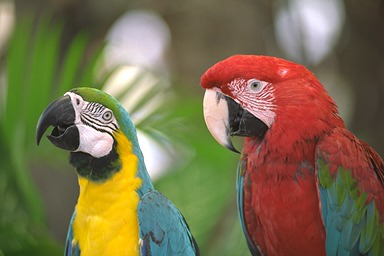

In [ ]:
original_image2.show()

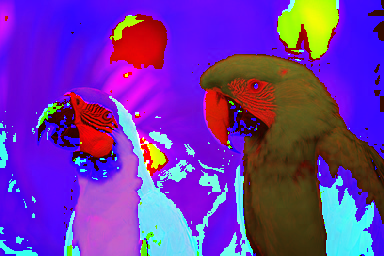

In [ ]:
#Convertendo da classe PIL.Image.Image para numpy.ndarray
image_np = np.array(original_image2, 'uint8')

image_yiq = rgb_to_yiq(image_np)

# Convertendo a imagem para PIL.Image.Image
new_image = Image.fromarray(np.uint8(image_yiq))
new_image.show()

# image_yiq = rgb_to_yiq(original_image2)
# image_yiq.show()

In [ ]:
### ANOTAÇÃO: tentei fazer os passos de conversão de ndarray para pill.Image porém o pill coloca os valores negativos para 0 e maiores que 255 
### para 255 resultando em grandes perdas na volta para o rgb

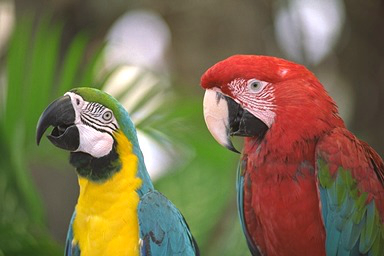

In [ ]:
image_rgb = yiq_to_rgb(image_yiq)

# Convertendo a imagem 
image_rgb = Image.fromarray(np.uint8(image_rgb)).convert('RGB')

image_rgb.show()

# image_rgb = yiq_to_rgb(image_yiq)
# image_rgb.show()

###Negativo - Banda a Banda Y

Explicação...

In [ ]:
from numpy.core.function_base import linspace
def y_negative(image):  
  image_yiq = rgb_to_yiq(image)

  negative_y_image = []

  for line in image_yiq:
    new_line = []
    for pixel in line:
      y,i,q = pixel[0], pixel[1], pixel[2]  

      # Novo pixel
      new_line.append([255-y, i, q]) # Para RGB

    # Nova linha
    negative_y_image.append(new_line)


  # Convertendo a imagem para PIL.Image.Image
  # negative_y_image = Image.fromarray(np.uint8(negative_y_image)).convert('RGB')

  return yiq_to_rgb(negative_y_image)

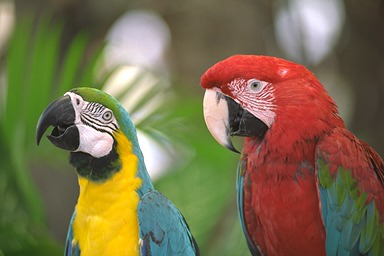

In [ ]:
original_image2.show()

Convertendo a imagem em ndarray e aplicando a função de negativo em y

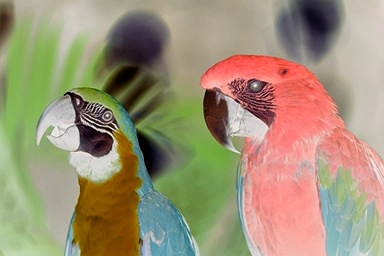

In [ ]:
image_np = np.array(original_image2, 'uint8')

image = y_negative(image_np)

image = Image.fromarray(np.uint8(image))

image.show()

###Negativo - Banda a Banda RGB

Explicação...

In [ ]:
def rgb_negative(image):
  # Convertendo da classe PIL.Image.Image para numpy.ndarray
  image_np = np.array(image, 'uint8')

  # Nova imagem
  negative_image = []

  for line in image_np:
    new_line = []
    for pixel in line:
      r, g, b = pixel[0], pixel[1], pixel[2]  

      # Novo pixel
      new_line.append([255-r,255-g, 255-b]) 

    # Nova linha
    negative_image.append(new_line)

  # Convertendo a imagem para PIL.Image.Image
  negative_image = Image.fromarray(np.uint8(negative_image)).convert('RGB')

  return negative_image

####Imagem Original

In [ ]:
original_image1.show()

####Negativo nas bandas RGB

In [ ]:
negative_image = rgb_negative(original_image1)
negative_image.show()

### Correlação m x n sobre R, G e B a partir de um aquivo .txt



In [ ]:
"""TODO: ARRUMAR UMA FORMA DE TODAS ESSAS FUNÇÕES NÃO ABRIREM OS ARQUIVOS
      É POSSÍVEL ABRIR OS ARQUIVOS NA FUNÇÃO DE CORREÇÃO E PASSAR O ARQUIVOS  JÁ
      ABERTO ṔARA AS FUNÇÕES"""

def get_mask(path):
  """
    Recebe o caminho do arquivo contendo a mascara e tranforma em uma martriz

    path: Caminho do arquivo .txt com a mascara
  """

  with open(path, 'r') as mask_file:
    mask = []
    for line in mask_file.readlines():
      mask_line = []
      for element in line.split(" "):
          mask_line.append(float(element.replace('\n', '').replace('X', '')))

      mask.append(mask_line)
      # mask_size = (len(lines), len(lines[0])-1)  # não conta \n
    print(mask)
    return mask

def get_mask_pivot(path):
  """
    Recebe o caminho do arquivo contendo a mascara e retorna a posição do pivot da mascara

    path: Caminho do arquivo .txt com a mascara
  """

  with open(path, 'r') as mask_file:
    lines = mask_file.readlines()
    for i in range(len(lines)):
      for j in range(len(lines[i].split(" "))):
        if "X" in lines[i].split(" ")[j]:
          return [i, j]

def get_pivot_distances(mask, pivot_position):
  top, right, bottom, left = 0, 0, 0, 0
  mask_size = (len(mask), len(mask[0]))

  left = pivot_position[1]
  top = pivot_position[0]

  # TODO bottom e right a partir dos valores de left e top

  print(top, left)




  print(mask_size, pivot_position)




mask = get_mask('/content/drive/MyDrive/pdi_images/3x3_mask.txt')
pivot_position = get_mask_pivot('/content/drive/MyDrive/pdi_images/3x3_mask.txt')
get_pivot_distances(mask, pivot_position)

[[0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5]]
4 0
(5, 5) [4, 0]


In [ ]:
def correlation(image):
  """
    imagem: Imagem em formato ndarray
  """

  def filter(line, column, image, correlation_mask):
    """
      Aplica a correlação ao pixel na posição line x column

      line: Linha do pixel
      column: Coluna do pixel
      imagem: Imagem em formato ndarray
      correlation_mask: Mascara de correlação
    """

    # result = 0
    line_correlation = 0 # linha da mascara
    column_correlation = 0 # coluna da mascara
    r, g, b = 0, 0, 0

    # Percorre a vizinhaça do pixel para fazer o calculo de acordo com a mascara
    for i in range(-7, 8):      
      for j in range(-7, 8):
        try:          
          r += math.ceil((correlation_mask[line_correlation][column_correlation])*(image[line+i][column+j][0]))
          g += math.ceil((correlation_mask[line_correlation][column_correlation])*(image[line+i][column+j][1]))
          b += math.ceil((correlation_mask[line_correlation][column_correlation])*(image[line+i][column+j][2]))

          # Normalizando os valores das bandas
          r = 255 if r > 255 else r
          g = 255 if g > 255 else g
          b = 255 if b > 255 else b

        except Exception as e:
          # print(e, line+i, column+j)
          pass

        column_correlation+=1

      line_correlation+=1

    return [r, g, b]

  default_correlation = [[-1, 0, 1], [-2,1,2], [-1, 0, 1]]
  print('tamanho', len(default_correlation), len(default_correlation[0]))

  # Copiando a imagem para não alterar a imagem original
  new_image = image.copy()
  for line in range(len(image)):
    for column in range(len(image[line])):      
      # Aplica a correlação para cada prixel
      result = filter(line, column, image, default_correlation)
      new_image[line][column] = result

  return new_image
  

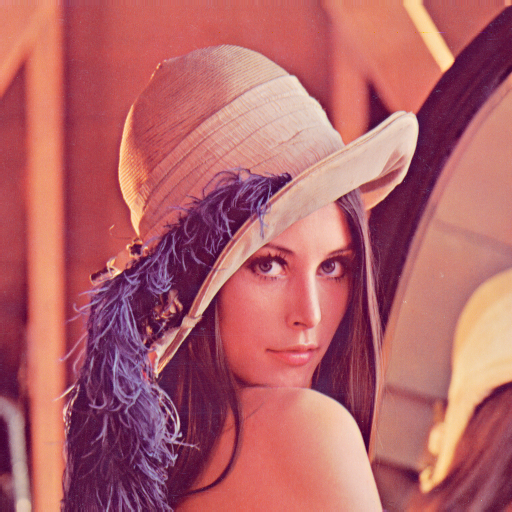

In [ ]:
original_image1.show()

tamanho 3 3


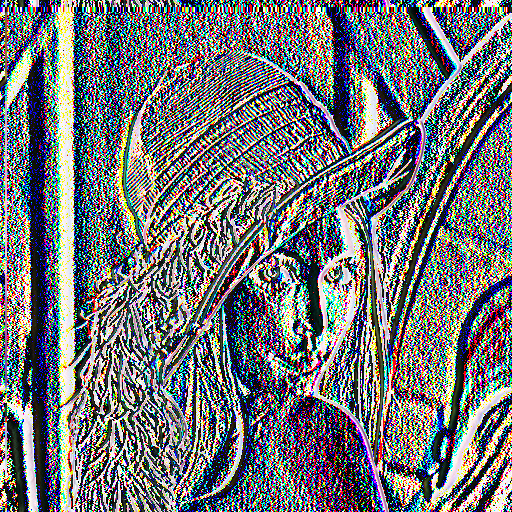

In [ ]:
# Convertendo da classe PIL.Image.Image para numpy.ndarray
image_np_filter = np.array(original_image1, 'uint8')

# Aplicando a função para cada linha da imagem
image_np_filter = np.array(correlation(image_np_filter))

# Convertendo a imagem para PIL.Image.Image
image_filter = Image.fromarray(np.uint8(image_np_filter)).convert('RGB')
# print(image_np_filter.shape)
image_filter.show()

### Filtro da mediana

In [ ]:
def median(m, n, image):
  